In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#model class
class Model(nn.Module):
  def __init__(self,input_features=4,h1=8,h2=9,output_features=3):
    super().__init__()
    self.fc1=nn.Linear(input_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,output_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [ ]:
#pick a manual seed for randomization
torch.manual_seed(32)
#create an instance of the model
model=Model()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
url="/content/irisdataset.csv"
my_df=pd.read_csv(url)

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
my_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
my_df['Species']=my_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
x=my_df.drop('Species',axis=1).values
#x=my_df.drop('Id',axis=1).values
y=my_df['Species'].values


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([120, 4])
torch.Size([30, 4])
torch.Size([120])
torch.Size([30])


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'epoch:{i} loss:{loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0 loss:1.169895887374878
epoch:10 loss:0.9578844308853149
epoch:20 loss:0.7988812923431396
epoch:30 loss:0.634953498840332
epoch:40 loss:0.44043001532554626
epoch:50 loss:0.291716992855072
epoch:60 loss:0.17829042673110962
epoch:70 loss:0.11587586998939514
epoch:80 loss:0.08928147703409195
epoch:90 loss:0.07743765413761139


Text(0.5, 0, 'epoch')

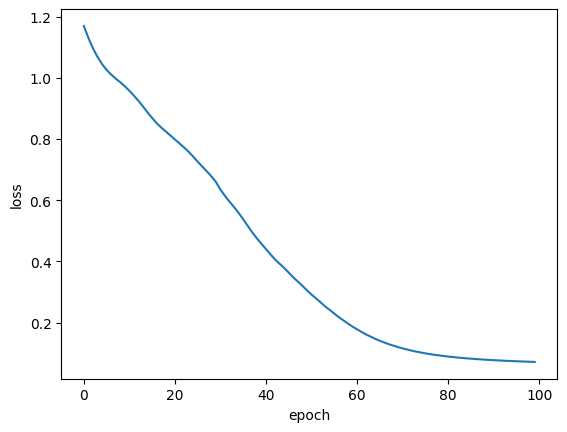

In [ ]:
from sys import ps1
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#evaluate on test dataset
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)


In [ ]:
loss

tensor(0.0539)

In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val=model.forward(data)

    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x='verticolor'
    else:
      x='virginica'
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item()==y_test[i]:
      correct +=1

  print(f'We Got {correct} correct classification')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0 	 0
21.) tensor

In [ ]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])


In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [ ]:
#save our model and load
torch.save(model.state_dict(),'iris_model.pt')

In [ ]:
new_model=Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-111-782e0be19829>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)